In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_ReadmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")

## 1. Replace all the null values in ReadmissionFlag with 0.

In [11]:
df_ReadmissionRegistry["ReadmissionFlag"].fillna(0, inplace = True)
df_ReadmissionRegistry

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


## 2.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [22]:
RFV = input("Enter Reason for visit: ").title()
Count_RFV = len(df_EDvisits[df_EDvisits["ReasonForVisit"]==RFV])
print(Count_RFV)

Enter Reason for visit:  migraine


156


## 3.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

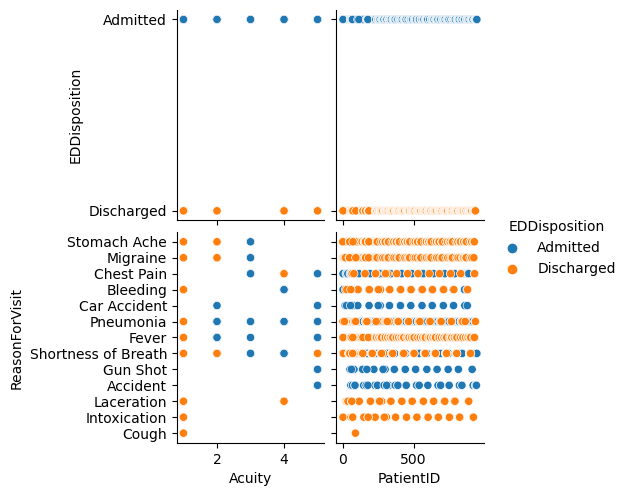

In [52]:
sns.pairplot(data=df_EDvisits, hue="EDDisposition", x_vars=["Acuity","PatientID"], y_vars=["EDDisposition","ReasonForVisit"])
#sns.pairplot(data=df_Providers, hue="ProviderSpecialty", kind="hist", x_vars=["ProviderSpecialty"], y_vars=["ProviderID"])

In [53]:
Count_Spanish = len(df_Patients[df_Patients["Language"]=="Spanish"])
print(Count_Spanish)

110


## 5. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

## 6. Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [58]:
LOS = float(input("Enter Length of Stay:"))
Patients_LOS = (df_ReadmissionRegistry[df_ReadmissionRegistry["ExpectedLOS"]>LOS])
Patients_LOS

Enter Length of Stay: 10


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
6,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198,1.0,5.0,1.0
8,355,10,2018-01-01,2018-01-07 20:50:16.780,Transfer,ICU,Stroke,14.787084,0.106645,1.0,5.0,1.0
9,54,11,2018-01-01,2018-01-08 19:53:38.845,Home,Hospitalist,Pneumonia,12.081905,0.932385,1.0,6.0,1.0
12,18,14,2018-01-18,2018-01-25 14:43:35.285,Home,General Medicine,Stroke,10.060740,0.253516,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
708,586,731,2018-02-22,2018-03-03 21:51:47.920,Home,Cardiology,Heart Failure,15.435455,0.361812,1.0,1.0,1.0
710,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892,1.0,3.0,1.0
714,533,737,2018-02-22,2018-03-07 19:50:58.083,Home,ICU,Pneumonia,10.563688,0.583075,NaN,NaN,NaN
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN


## 7.Create a bar chart between expectedLOS & Primary diagnosis.

Text(0.5, 1.0, 'Expected LOS vs Primary Diagnosis')

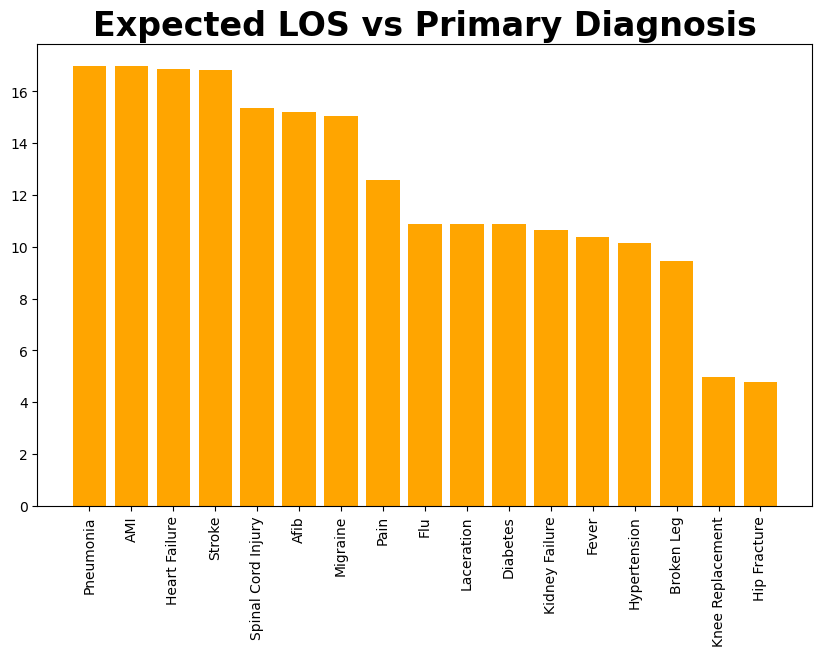

In [39]:
plt.figure(figsize=(10,6))

df_sorted = df_ReadmissionRegistry.sort_values("ExpectedLOS",ascending=False)

 
plt.bar(x=df_sorted["PrimaryDiagnosis"],
 
        height=df_sorted["ExpectedLOS"], color="orange")

plt.xticks(rotation=90)

plt.title("Expected LOS vs Primary Diagnosis", fontsize=24, fontweight="bold")

 


## 8.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [24]:
# Get list of patient id's where reason for visit is Migraine or Pneumonia and Acuity is 2 or more
RFV = ["Migraine","Pneumonia"]
df_EDvisits_List = (df_EDvisits
                    [
                        #(df_EDvisits["ReasonForVisit"].isin(["Migraine","Pneumonia"]))
                        (df_EDvisits["ReasonForVisit"].isin(RFV))
                        & (df_EDvisits["Acuity"] >= 2)
                    ]
                   )
#df_EDvisits_List["PatientID"]

# Get Patient details from Patients worksheet which satisfies above condition
df_Patients_List = df_Patients[df_Patients["PatientID"].isin(df_EDvisits_List["PatientID"])]



#Patients data which satisfies above criteria
#df_Patients_List

#ED Visits data
#df_EDvisits_List

df_patients_edvisits = pd.merge(df_Patients_List, df_EDvisits_List, on = 'PatientID')

df_patients_edvisits.sort_values(by=['FirstName','ReasonForVisit','VisitDate'])




,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
101,324,Aguste,Teal,1977-08-16 07:17:44.162,Female,White,English,578,2020-01-08 02:55:18.304,2020-01-08 15:03:34.805,2,Migraine,Admitted
69,225,Aime,Cordoba,1979-08-15 04:24:17.316,Male,Black/African-American,English,316,2020-01-04 20:36:31.924,2020-01-05 00:25:08.256,2,Pneumonia,Admitted
54,175,Aime,Eyers,1964-08-31 17:11:30.257,Male,Black/African-American,English,473,2020-01-06 18:33:28.819,2020-01-07 16:54:33.498,4,Pneumonia,Admitted
11,30,Ala,Halpert,1986-11-26 10:44:22.628,Female,White,Spanish,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
2,8,Alexandra,Green,1967-06-16 16:37:21.694,Male,White,English,8,2020-01-01 01:15:35.564,2020-01-02 00:07:24.636,2,Migraine,Discharged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,570,Willette,Group,1962-02-17 21:52:09.523,Male,Black/African-American,English,824,2020-01-11 04:31:12.223,2020-01-12 01:57:13.436,2,Pneumonia,Admitted
180,747,Yuri,Darwent,1968-08-07 14:45:51.490,Female,White,English,1001,2020-01-13 07:10:29.647,2020-01-14 01:06:58.322,4,Pneumonia,Admitted
4,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
112,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English,624,2020-01-08 16:07:25.273,2020-01-09 02:27:03.407,5,Pneumonia,Admitted


## 9. Using numpy functions, multiply the following arrays : a=np.arange(6).reshape(2,3), b=np.arange(6).reshape(3,2)

In [38]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
np.dot(a,b)


array([[10, 13],
       [28, 40]])

## 10.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [129]:
from datetime import datetime
import statistics

df_Patients['Age'] = round((datetime.now() - df_Patients['DateOfBirth']) / np.timedelta64(1, 'Y'))

#df_Patients['Age']

#np.percentile(df_Patients['Age'], [0,25,50,75]), #np.arange(0.25,1,0.25))

#statistics.quantiles(df_Patients['Age'])

df_Patients['Age'].quantile([0, .25, .5, .75])


0.00    36.0
0.25    43.0
0.50    50.0
0.75    57.0
Name: Age, dtype: float64

## 11.Calculate average LOS.

In [104]:
#Get Actual LOS by difference between Discharge and Admission Date
df_Discharges['diff_days'] = (df_Discharges['DischargeDate'] - df_Discharges['AdmissionDate']) / np.timedelta64(1, 'D')

#Get average of the LOS obtained in previous step
np.round(np.mean(df_Discharges['diff_days']))



10.0

## 12.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [39]:
#df_ReadmissionRegistry_new = df_ReadmissionRegistry

#pd.to_datetime(df_ReadmissionRegistry['DischargeDate']).dt.date
#pd.to_datetime(df_ReadmissionRegistry['DischargeDate']).dt.time
#df_ReadmissionRegistry.insert("Discharge_dt",[pd.to_datetime(df_ReadmissionRegistry['DischargeDate']).dt.date])

df_ReadmissionRegistry = df_ReadmissionRegistry.assign(Discharge_dt = lambda x : pd.to_datetime(x['DischargeDate']).dt.date, 
                                                      Discharge_time = lambda x : pd.to_datetime(x['DischargeDate']).dt.time)
df_ReadmissionRegistry

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Discharge_dt,Discharge_time
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,2018-01-04,19:59:31.391000
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,2018-01-04,21:28:51.898000
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,2018-01-04,22:28:23.672000
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-05,05:47:04.933000
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,2018-01-05,14:18:30.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,2018-03-07,21:22:10.061000
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,2018-03-08,02:43:18.749000
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,2018-03-08,09:27:18.377000
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,2018-03-10,06:06:12.068000


## 13.Violin plot for Level of Acuity by Visit Reason

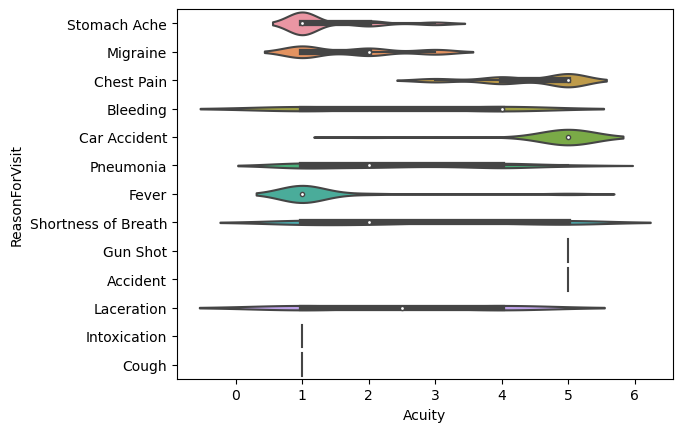

In [7]:

vp = sns.violinplot(,x=df_EDvisits['Acuity'],y=df_EDvisits['ReasonForVisit'] data=df_EDvisits)

## 14.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [8]:
df_Providers.groupby(df_Providers['ProviderSpecialty']).count()


,ProviderID,ProviderName,ProviderDateOnStaff
ProviderSpecialty,,,
Cardiology,8,8,8
Pediatrics,9,9,9
PrimaryCare,16,16,16
Surgery,7,7,7


## 15.Count of canceled status.

In [13]:
df_AmbulatoryVisits[df_AmbulatoryVisits['VisitStatus']=="Canceled"]['VisitID'].count()


60

## 16.Display total count of patients service wise based on gender.

In [4]:


df_patients_ReReg = pd.merge(df_Patients, df_ReadmissionRegistry, on = 'PatientID')
df_patients_ReReg.groupby(['Gender','Service']).size()
#df_patients_ReReg

#df_patients_ReReg.groupby(['Gender'],['Service'])['Gender'].count()

Gender  Service         
Female  Cardiology           41
        General Medicine    114
        Hospitalist          35
        ICU                  65
        Neurology            34
        Orthopeadics         22
Male    Cardiology           54
        General Medicine    149
        Hospitalist          66
        ICU                  86
        Neurology            31
        Orthopeadics         23
dtype: int64

## 17.Plot a graph to count the patients based on discharge disposition.

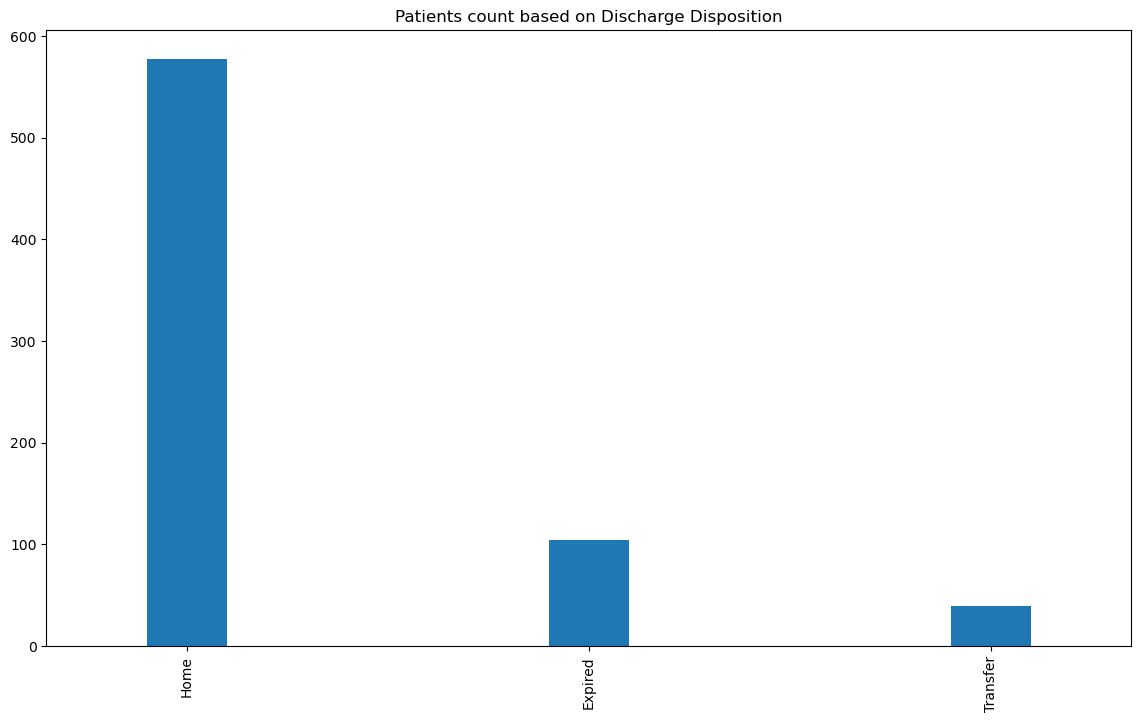

In [101]:
#df_DD = df_Discharges['DischargeDisposition']
#df_Srvc = df_Discharges['DischargeDisposition']
#df_Ptnt = df_Discharges['PatientID'].value_counts()
#plt.bar(df_DD,df_Ptnt)


ax.set_xlabel("Discharge Disposition")
ax.set_ylabel("Patient Count")
ax = df_Discharges['DischargeDisposition'].value_counts().plot(kind='bar',
                                    figsize=(14,8), width =0.2,
                                    title="Patients count based on Discharge Disposition")






## 18.Display the data where actual LOS is greater than expected LOS.

In [3]:
df_Discharges = df_Discharges.assign(Actual_LOS = lambda x : (
                                                            x['DischargeDate'] - x['AdmissionDate']
                                                                ) / np.timedelta64(1, 'D')
                                                            )

df_Discharges[df_Discharges['Actual_LOS']  >  df_Discharges['ExpectedLOS']]
#Get average of the LOS obtained in previous step


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,Actual_LOS
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12.124360
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8.564307
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15.748346
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9.096593
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12.153398
...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6.370581
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8.249562
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11.016203
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13.146589


## 19.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [11]:
df_Discharges = df_Discharges.assign(Actual_LOS = lambda x : (
                                                            x['DischargeDate'] - x['AdmissionDate']
                                                                ) / np.timedelta64(1, 'D')
                                                            )

np.round(df_Discharges.groupby(['DischargeDisposition','Service'])['Actual_LOS'].mean())


DischargeDisposition  Service         
Expired               Cardiology           9.0
                      General Medicine     9.0
                      Hospitalist         11.0
                      ICU                 10.0
                      Neurology           11.0
                      Orthopeadics        12.0
Home                  Cardiology          11.0
                      General Medicine    10.0
                      Hospitalist         10.0
                      ICU                 10.0
                      Neurology           10.0
                      Orthopeadics         9.0
Transfer              Cardiology          12.0
                      General Medicine    11.0
                      Hospitalist          9.0
                      ICU                  9.0
                      Neurology           12.0
                      Orthopeadics        17.0
Name: Actual_LOS, dtype: float64

## 20.Display using a donut chart the patient count in the ReAdmissionRegistry.

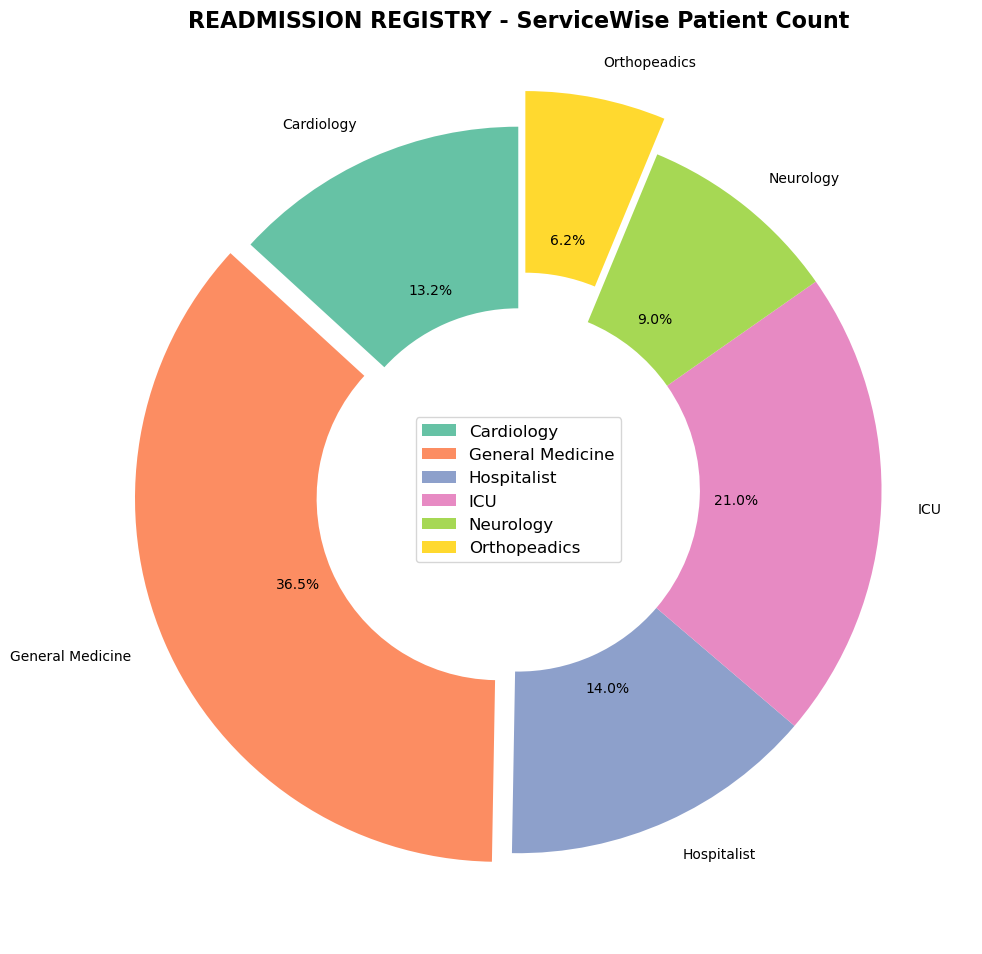

In [86]:


df_ReReg = df_ReadmissionRegistry.groupby(['Service']).size()

component = df_ReReg.index
#data = df_ReadmissionRegistry['PatientID']
data = df_ReReg
explode = [0,0.06,0,0,0,0.10]


fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
colors=sns.color_palette('Set2')



wedges, texts, prcnt = ax.pie(
    data, labels = component, wedgeprops=dict(width=0.5),
    startangle=90, autopct='%1.1f%%',  colors = colors, explode = explode 
    )

plt.legend(wedges, component, loc="center",fontsize=12)


ax.set_title("READMISSION REGISTRY - ServiceWise Patient Count",fontdict={'fontsize': 16, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot_RR.png',dpi=100, format='png', bbox_inches='tight')
plt.show()